In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import os
import copy
import seaborn as sns
from sklearn.linear_model import enet_path
import matplotlib.pyplot as plt
from itertools import cycle
from random import choice
import copy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
p_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Placebo_MRS', allow_pickle=True)
k_MRS=np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Ketamine_MRS',allow_pickle=True)

In [ ]:
X_3_k= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_k.npy', allow_pickle=True)
X_3_p= np.load('C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_3_p.npy', allow_pickle=True)

In [4]:
k_MRS_arr=np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_Ketamine_MRS.npy", allow_pickle=True)

In [15]:
y_test=np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_test.npy", allow_pickle=True)
y_train=np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/Y_train.npy", allow_pickle=True)
#np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_train.npy", allow_pickle=True)
#np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_test.npy", allow_pickle=True)

In [7]:
# standardized X input
X_train_st=np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_train_st.npy", allow_pickle=True)
X_test_st=np.load("C:/Users/canlab/Desktop/Masterthesis_python/ReDoneAnalysis20200420/Elastic_net/X_test_st.npy", allow_pickle=True)

## Elastic net CV

Computing regularization path using the coordinate descent elastic net...


<IPython.core.display.Javascript object>


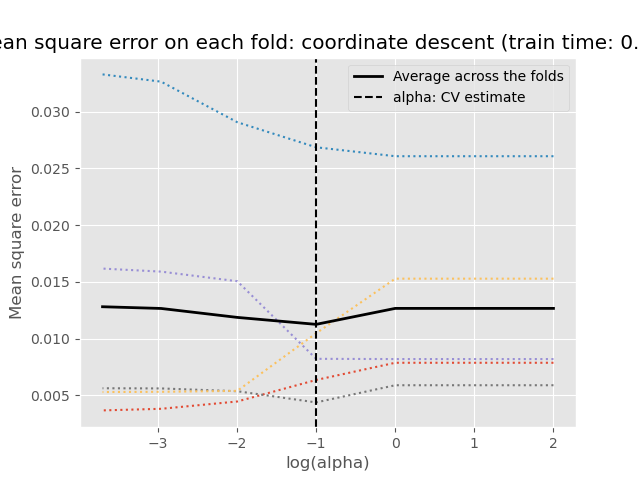

Text(0.5, 1.0, 'Mean square error on each fold: coordinate descent (train time: 0.03s)')

In [25]:
%matplotlib notebook
# LassoCV: coordinate descent
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# Compute paths
print("Computing regularization path using the coordinate descent elastic net...")
t1 = time.time()
# alphas in log space, get a training (21p) and test (6p) sets!
#you need
model = ElasticNetCV(cv=5, alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],normalize=False,random_state=0, l1_ratio=0.5).fit(X_train_st, y_train)
t_elastic_cv = time.time() - t1

# Display results
m_log_alphas = np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_elastic_cv)

In [26]:
model.alpha_

0.1

In [27]:
model.coef_

array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.  

In [21]:
y_train

array([-0.14103245,  0.02411349,  0.02829101,  0.03336298,  0.29344363,
        0.0832351 ,  0.04083298,  0.09861005,  0.00403512,  0.15693378,
       -0.09216019,  0.05931886, -0.08023397,  0.0843336 ,  0.08737258,
       -0.0425311 , -0.17899989,  0.09638511,  0.02139515, -0.05857503])

In [28]:
model.score(X_test_st, y_test)

-0.22003481168659333

In [29]:
model.score(X_train_st, y_train)

0.4122665340478511